# Lab 3 - Twin and control

In this lab we will learn an model of the pendulum either with your own data or for now artificial data. 
You will need the implementation of the motor class from lab 1 in this lab.

The following things will be done in this lab:

* Learn a model of a the pendulum with curve fitting an Neural network
* Experiment with the amount and values of data 
  
    The control problem is split up in 2 parts: swing up and balance.  
    For the swing up control part:   
     
     
* Implement the motor class and evaluate the best first motor action
* Sequentially do this for every new state of the pendulum until the angle is pi radius
     
    For the balance part:  
         
         
* Implement and experiment with PID control
* Evaluate the movement of pivot point (what is the range)


In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from sklearn.neural_network import MLPRegressor
import math
import sklearn
print('sklearn version: ',sklearn.__version__)
# Define the simulation step
dt = 0.00001

sklearn version:  0.22.1


In [3]:
# change these parameters to more realistic values
mu = 0.3
L = 3
g = 9.8

In [4]:
# To make use of scipy.optimize curve_fit this is the form we should present the model
# watch https://www.youtube.com/watch?v=tl5QNhSe0Yk to fresh up your knowledge on curve fitting
def model(X, mu, L, g):
    theta, theta_dot = X
    result = [-mu*theta_dot[i] - (g/L)*(math.sin(theta[i])) for i in range(len(theta))]
    return result

# ''' return the angular acceleration of the pendulum theta is the angle, thata dot the angular velocity''' 
# (g/L should be in brackets)

If you make use of your own created data from the pendulum,  
you will need to calculate the angular speed so that you will have both state parameters.  
Here we will create some noisy data: that we can use for curve fitting.

In [5]:
# Some artificially noisy data to fit, x and y are theta and theta_dot and z is the model output (theta double dot) with some noise. 
# change the g_range to give the data generation a broader scope of values. Experiment with the effect.

g_range = 5.
data_size = 200

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)#theta
y = np.linspace(-g_range,g_range, data_size)  # theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

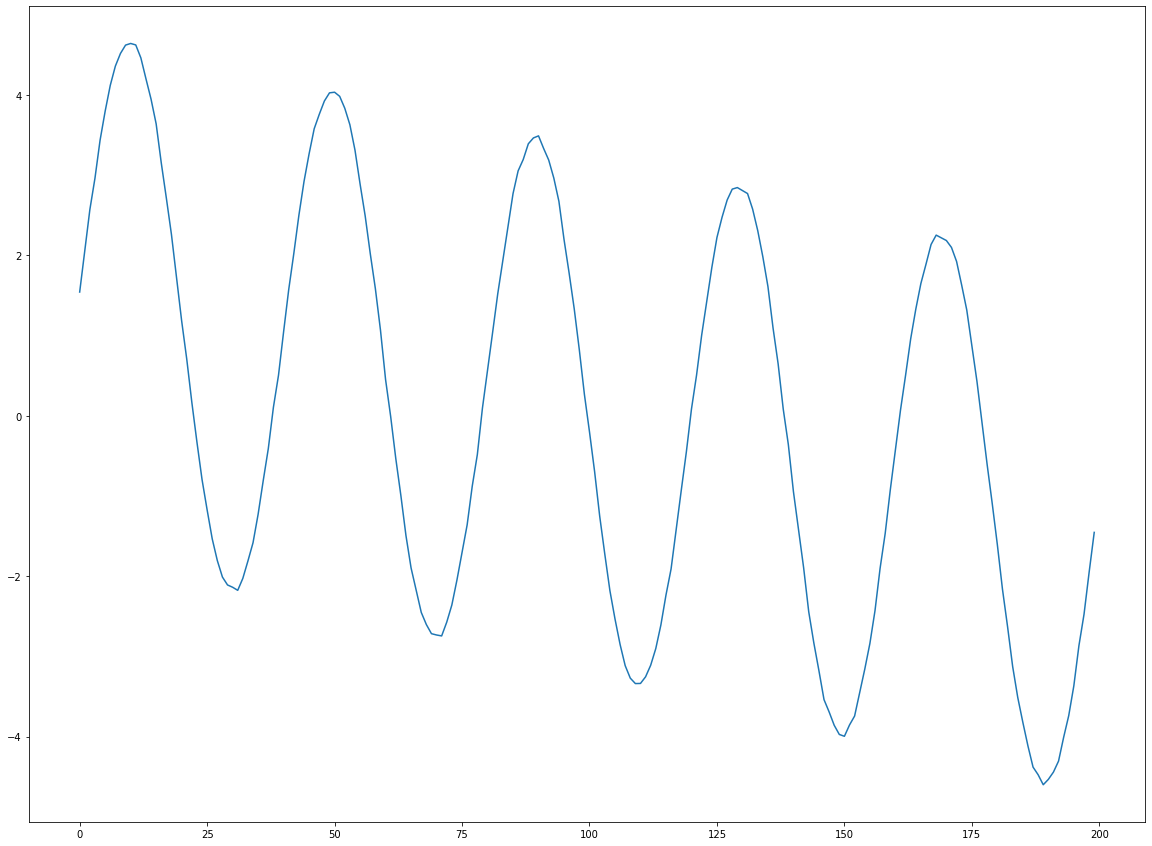

In [6]:
plt.figure(figsize=(20,15))
plt.plot(z)

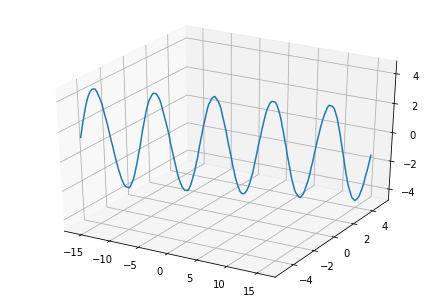

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z)

In [8]:
#these are your initialization values of the model parameters (mu, L, g)
p0 = 2.5, 2., 9.8
#fit function with some initial parameters for mu, L and g
f = curve_fit(model, (x,y), z, p0)#we fit the function model to the data x, y and z
print(f[0])
print('g/L:', f[0][2]/f[0][1])

[ 3.00265338e-01 -1.61825729e+03 -5.28342737e+03]
g/L: 3.2648871079472648


In [9]:
f 

(array([ 3.00265338e-01, -1.61825729e+03, -5.28342737e+03]),
 array([[2.08203891e-06, 1.10211266e+04, 3.59826870e+04],
        [1.10211265e+04, 4.00610262e+16, 1.30794546e+17],
        [3.59826866e+04, 1.30794546e+17, 4.27028830e+17]]))

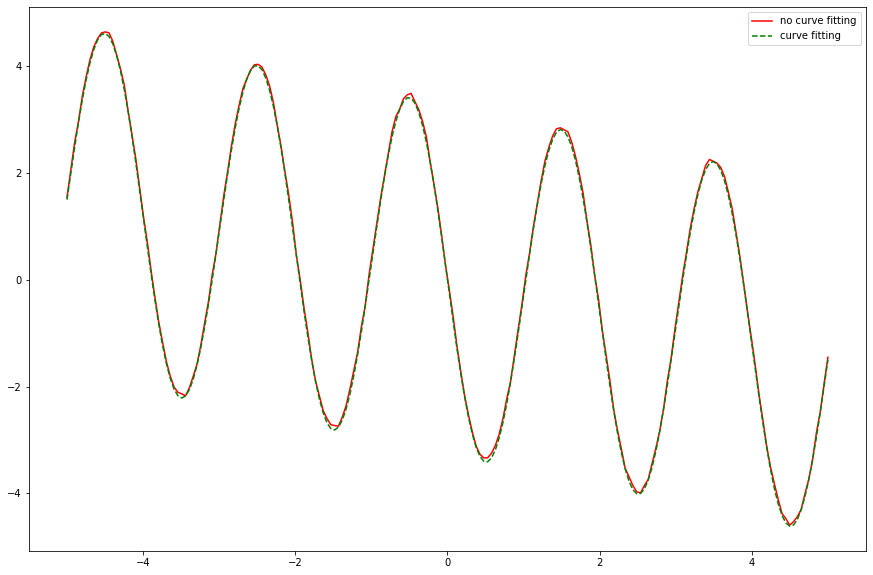

In [10]:
plt.figure(figsize=(15,10))
plt.plot(y,z,'r-',label='no curve fitting')#theta double dot with noise
plt.plot(y,model((x,y), *f[0]), 'g--', label='curve fitting')#theta double dot with parameters from curve fitting
plt.legend()
plt.show()

**1. Question [5 points]:** Plot different learned model parameters by increasing the amount of data. Explain what you see. Wich parameter can we fit and wich one not? come up with an explanaition. For every combination of learned g and L calculate the ratio. 

*The data was increased gradually. The range was increased gradually as well.
The pendulum is moving more, increasing and decreasing its angular acceleration faster. The origin data is more similar to the fitted data, making the noise less visible. g and L have the same ratio but their values increase proportionally. mu values remain almost constant (0.3)*

mu  0.3004412496409889
L  4191.768324136957
g  13684.026408349431
g/L: 3.2644996932569823
L/9.8  0.3061224489795918


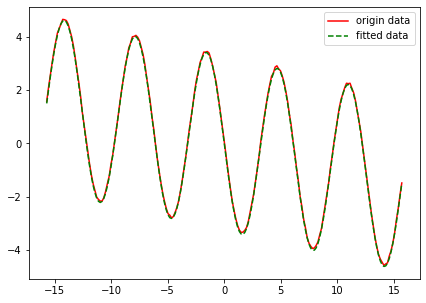

mu  0.3001543948247319
L  -7725.487951814581
g  -25249.93286700749
g/L: 3.2683932748968596
L/9.8  0.3061224489795918


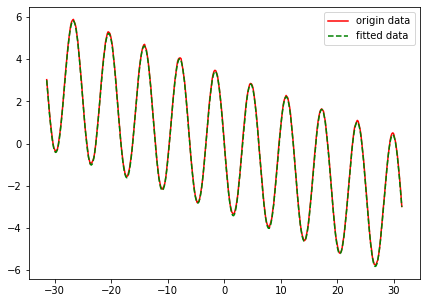

mu  0.3003156881639999
L  1107.7934233162912
g  3618.0139252132403
g/L: 3.26596443801079
L/9.8  0.3061224489795918


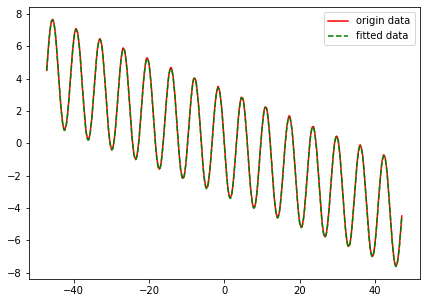

In [11]:
for i in range(1,4,1):
    g_range = i*5.
    data_size = i*200

    x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
    y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
    z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) /10# theta_double_dot with some noise

    #these are your initialization values of the model parameters (mu, L, g)
    p0 = 2.5, 2., 9.8
    #fit function with some initial parameters for mu, L and g
    f = curve_fit(model, (x,y), z, p0)
    print('mu ',f[0][0])
    print('L ',f[0][1])
    print('g ',f[0][2])
    print('g/L:',f[0][2]/f[0][1])
    print('L/9.8 ',L/9.8)

    plt.figure(figsize=(7,5))
    plt.plot(x,z,'r-',label='origin data')
    plt.plot(x,model((x,y), *f[0]), 'g--', label='fitted data')
    plt.legend()
    plt.show()

**2.Question [5 points]:** Randomly initialize p0 200 times and apply the curve_fit.  
Explain the results and plot the parameters as below.  

*The ratio g/L barely variates in the 200 simulations (it is always around 3.26). The value of mu is always around 0.3. It doesn't seem to matter very much what values we choose for initializing the curve_fit algorithm*

In [12]:
g_range = 20.
data_size = 800

x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

#these are your initialization values of the model parameters (mu, L, g)
f = []
for i in range(200):
    p0 = np.random.random(), np.random.random(), np.random.random()
    f.append(curve_fit(model, (x,y), z, p0))

In [13]:
p0_mu = [(f[i][0][0]) for i in range(200)]#200 values of mu
p0_g = [f[i][0][2] for i in range(200)]#200 values of g
p0_L = [f[i][0][1] for i in range(200)]#200 values of L

p0_g = np.asarray(p0_g)
p0_L = np.asarray(p0_L)

In [14]:
print(p0_g/p0_L)

[3.26644383 3.26644523 3.26644461 3.26644552 3.26644389 3.26644436
 3.26644434 3.2664436  3.2664453  3.26644673 3.26644522 3.26644484
 3.26644419 3.26644489 3.26644659 3.26644291 3.26644412 3.26644561
 3.26644594 3.2664438  3.266442   3.26644436 3.26644295 3.26644402
 3.26644131 3.26644503 3.26644363 3.26644177 3.26644371 3.26644469
 3.266443   3.26644407 3.26644368 3.2664451  3.26643981 3.2664453
 3.26644529 3.26644493 3.26644403 3.26644444 3.26644428 3.26644568
 3.26644308 3.26644554 3.2664475  3.26644484 3.26644489 3.26644625
 3.26644269 3.266443   3.26644481 3.26644667 3.26644426 3.26644488
 3.26644367 3.26644554 3.26644343 3.26644532 3.26644533 3.26644542
 3.26644394 3.26644658 3.26644354 3.26644382 3.26644522 3.26644285
 3.26644493 3.26644422 3.26644003 3.26644357 3.26644504 3.26644389
 3.26644603 3.26644549 3.26644415 3.26644592 3.26644601 3.26644427
 3.26644509 3.26644315 3.26644581 3.26644478 3.26644332 3.26644307
 3.26644267 3.26644579 3.26644263 3.26644606 3.26644197 3.26644

In [15]:
print(p0_mu)

[0.29993800380337204, 0.29993800382719693, 0.2999380038506666, 0.2999380038681835, 0.2999380038988019, 0.29993800386153074, 0.29993800385335234, 0.2999380037787138, 0.2999380039745947, 0.2999380038488571, 0.29993800381389474, 0.2999380037973555, 0.29993800383276503, 0.29993800383848523, 0.29993800384610986, 0.29993800385884206, 0.2999380038361553, 0.2999380038166681, 0.29993800379793795, 0.2999380038040309, 0.2999380039523221, 0.2999380038371297, 0.2999380037969931, 0.2999380038819904, 0.2999380038537431, 0.299938003818933, 0.29993800384419367, 0.29993800389547287, 0.29993800387855735, 0.29993800382979996, 0.2999380037744133, 0.29993800384223135, 0.299938003950698, 0.29993800389657377, 0.2999380037153674, 0.2999380038940662, 0.2999380038289798, 0.29993800387675423, 0.2999380037856384, 0.299938003855406, 0.299938003839278, 0.29993800381897606, 0.2999380038755352, 0.29993800386117464, 0.2999380037764792, 0.29993800384601066, 0.29993800381289165, 0.29993800384429825, 0.2999380038352485, 0

(array([ 3.,  0.,  2.,  2.,  3.,  6.,  8., 30., 57., 37., 30., 13.,  3.,
         2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([3.26643768, 3.26643843, 3.26643918, 3.26643993, 3.26644068,
        3.26644143, 3.26644218, 3.26644293, 3.26644368, 3.26644443,
        3.26644518, 3.26644593, 3.26644668, 3.26644743, 3.26644818,
        3.26644893, 3.26644968, 3.26645043, 3.26645118, 3.26645193,
        3.26645268]),
 <a list of 20 Patch objects>)

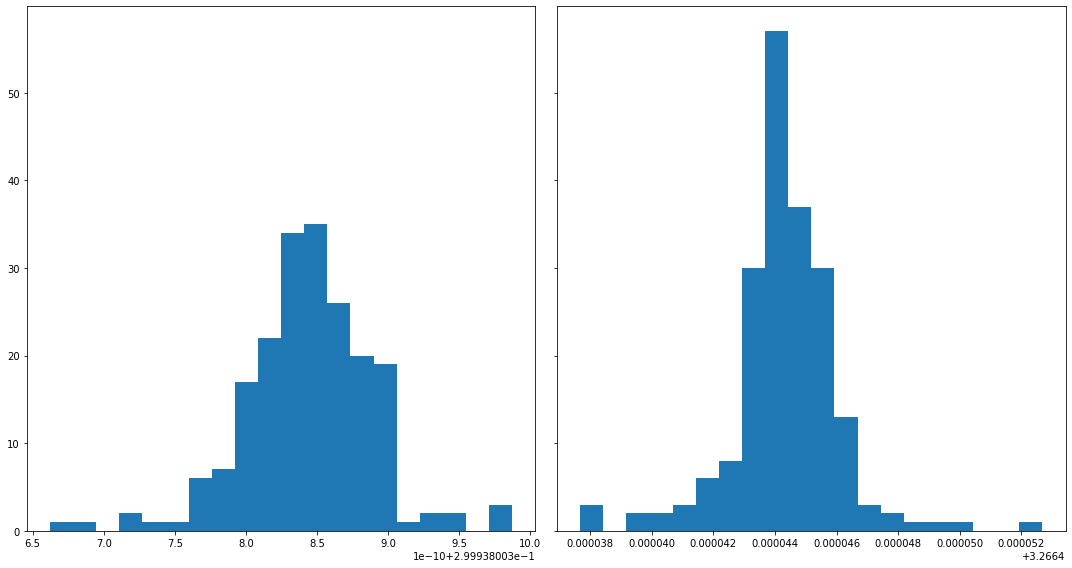

In [16]:
# Show histogram of values from randomly learning 
#we have now 200 different values for mu, L and g. We are going to represent them in histograms in 20 bins
n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(15,8))
axs[0].hist(p0_mu, bins=n_bins)
axs[1].hist((p0_g/p0_L), bins=n_bins)

Now we are going to train a neural network to learn the model. 
**3.Question [5 points]:** Experiment with the model hidden_layer_sizes and evaluate the predictions to the actual values using least_squared_error. What is the best model that you found? Also experiment with the alpha > this is a so called regularization term that penalizes large parameter values in the model. check out sklearn for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [17]:
from sklearn.metrics import mean_squared_error

# set the range and the number of datapoints
g_range = 20.
data_size = 200

# create the datapoints
x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
z = model((x,y), mu, L, g) * 1 + np.random.random(data_size) / 10 # theta_double_dot with some noise

# put in the data structure needed
X = list(zip(x,y)) # theta, theta_dot
Y = z # theta_double_dot + noise

In [18]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10),
                   random_state=1, max_iter=1000)
# I need to variate  hidden_layer_sizes and random_state:
#https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 4.89


In [18]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(10,10),
                   random_state=1, max_iter=2000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.04


In [19]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.09


In [21]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.06


In [22]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.10


In [23]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10,10,10),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.08


In [24]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(100,20,10),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 4.76


In [25]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,20,10),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.24


In [26]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(100,20,10),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.08


In [27]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(200,200),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.04


In [28]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(200,200),
                   random_state=1, max_iter=1000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 5.00


C:\Users\mitsy\OneDrive\Documentos\anacon\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(200,200),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 4.97


We can see that increasing the number of nodes in the hidden layer we increase the complexity of th Neural Network, but not necessarily give a better result, the smaller the alpha better the result but can prevent the training process to reach convergence, but it gives better results, so for some configurations worth increase the maximum number of iterations to give more epochs to reach convergence.

**4.Question [5 points]:** now visualize the phase portrait as learned with the neural network  
and inspect where the behaviour seems to be predicted correct and incorrect.

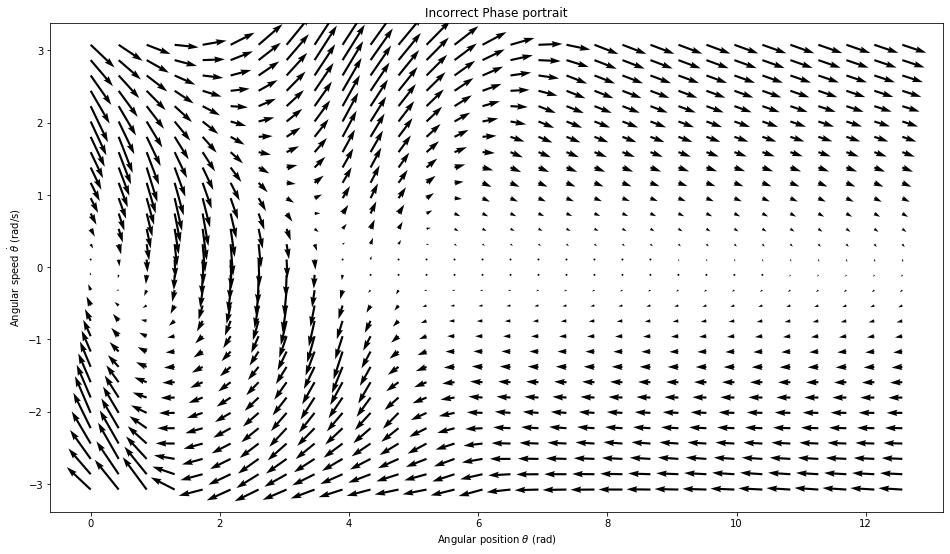

In [19]:
###### Phase Portrait ######

# prepare to plot
fig, ax = plt.subplots(figsize=(16,9))

# plot the phase portrait
x = np.linspace(0, 4*np.pi, 30) #values of angular position
y = np.linspace(-(0.3)*(g/L)*np.pi, (0.3)*(g/L)*np.pi, 30) #values of angular speed
uu, vv = np.meshgrid(x, y)
u = np.zeros(uu.shape) #values of angular position
v = np.zeros(vv.shape) #values of angular speed
for i in range(y.shape[0]):
    for j in range(x.shape[0]):
        theta = uu[i,j]
        theta_dot = vv[i,j]
        # Call the ANN model to give the value of get_theta_double_dot
        theta_double_dot = clf.predict([(uu[i,j], vv[i,j])])
        theta_dot += theta_double_dot * dt
        theta += theta_dot * dt
        u[i,j] = theta - uu[i,j]
        v[i,j] = theta_dot - vv[i,j]
q = ax.quiver(uu, vv, u, v)
ax.set_title('Incorrect Phase portrait')
ax.set_xlabel(r'Angular position $\theta$ (rad)')
ax.set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')
plt.show()

The phase portrait still shows some areas with distortion in comparison with the original phase portrait from the lab 1. We are going to increase the number of data points in all regions to increase the precision in this regions.

In [20]:
# set the range and the number of datapoints
g_range = 20.
data_size = 200

# create the datapoints
# x = np.linspace(-g_range*np.pi,g_range*np.pi,data_size)
# y = np.linspace(-g_range,g_range, data_size)  # x and y are theta and theta_dot
x = np.linspace(0, 4*np.pi, 30) #values of angular position
y = np.linspace(-(0.3)*(g/L)*np.pi, (0.3)*(g/L)*np.pi, 30) #values of angular speed
uu, vv = np.meshgrid(x, y)

z = model((uu.flatten(),vv.flatten()), mu, L, g) * 1 + np.random.random(*vv.flatten().shape) / 10 # theta_double_dot with some noise

# put in the data structure needed
X = list(zip(uu.flatten(),vv.flatten())) # theta, theta_dot
Y = z # theta_double_dot + noise

# ANN model
clf = MLPRegressor(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(10,10),
                   random_state=1, max_iter=10000)
clf.fit(X, Y)
print('MSE: {:.2f}'.format(mean_squared_error(clf.predict(X),Y)))

MSE: 0.01


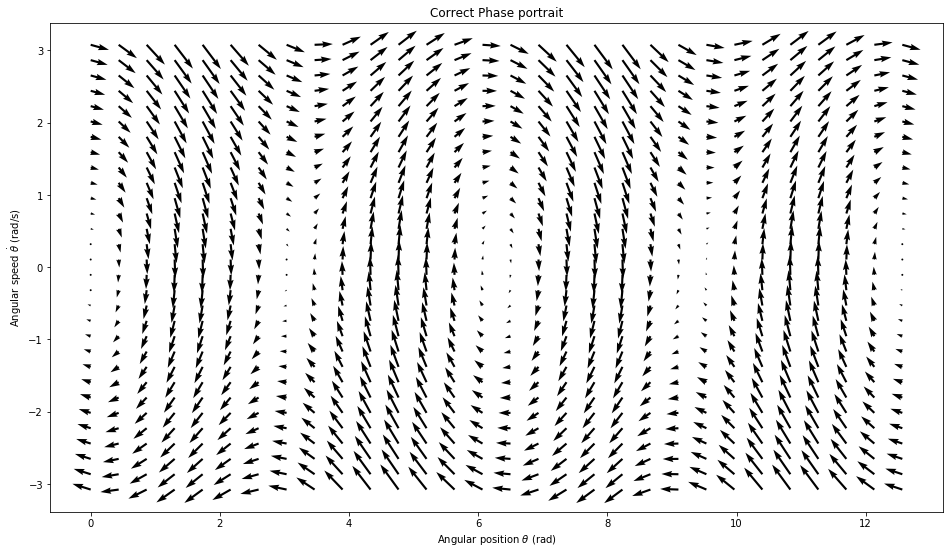

In [21]:
###### Phase Portrait ######

# prepare to plot
fig, ax = plt.subplots(figsize=(16,9))

# plot the phase portrait
x = np.linspace(0, 4*np.pi, 30) #values of angular position
y = np.linspace(-(0.3)*(g/L)*np.pi, (0.3)*(g/L)*np.pi, 30) #values of angular speed
uu, vv = np.meshgrid(x, y)
u = np.zeros(uu.shape) #values of angular position
v = np.zeros(vv.shape) #values of angular speed
for i in range(y.shape[0]):
    for j in range(x.shape[0]):
        theta = uu[i,j]
        theta_dot = vv[i,j]
        # Call the ANN model to give the value of get_theta_double_dot
        theta_double_dot = clf.predict([(uu[i,j], vv[i,j])])
        theta_dot += theta_double_dot * dt
        theta += theta_dot * dt
        u[i,j] = theta - uu[i,j]
        v[i,j] = theta_dot - vv[i,j]
q = ax.quiver(uu, vv, u, v)
ax.set_title('Correct Phase portrait')
ax.set_xlabel(r'Angular position $\theta$ (rad)')
ax.set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')
plt.show()

On the second model we can see the result is much closer to the original Phase Portrait. We have more data points in a wide range of values to train the model. 

# Controls
from lab one you'll need a couple of things. Namely the motor class and get_theta_double_dot_with_a.

In [22]:
# from lab 1:
def get_theta_double_dot_with_a(theta, theta_dot, a_motor):
    theta_double_dot_with_a = (-1) * ( g/L ) * np.sin(theta) - mu * theta_dot - (a_motor/L) * np.cos(theta)
    return theta_double_dot_with_a
# return the angular acceleration of the pendulum

In [23]:
##### Modified to include the distance #####
class Motor_Acc: # direction, speed, duration, dt (the delta_t is necessary for numerical integration)
    def __init__(self, direction, speed, duration, dt):#speed is the maximum speed
        self.direction = direction  # 0 (left) or 1 (right)
        self.speed = speed          # meter per second
        self.duration = duration    # seconds
        self.dt = dt                # Hertz
        self.time = 0
        self.dist = 0
        self.dist_list = []
        # how many tiks do we have?
        # ANS: time x dt
        self.tiks = int(self.duration / self.dt)
        self.func = self.create_func()
    
    def create_func(self): #create a list of accelerations    
        # The maximum acceleration for this motor is going to be 50m/s2
        max_acc = 50.0
        
        # The jerk of this motor is going to be 2000m/s3
        # We are assuming contant jerk
        jerk = 2000.0#m/s^3
        
        # Lets build the list
        func_list = []#list of acceleration values
        v_list = []#list of speed values
        short_mov = False #this variable is for making sure that the motor does not increase velocity infinetly, 
        #it'd change to True if the number of acceleration values reaches half of the 'tiks'
        
        # initial condition
        acc = 0.0
        v = 0.0

        # First half
        # -----------------------------------------------------------------------------------------------------
        # speed up
        while v < self.speed and not short_mov:
            # if there is no time to full movement
            # perform a shorter movement.
            if len(func_list) > int(self.tiks/2):
                short_mov = True
                break

            # acceleration up
            while acc < max_acc and not short_mov:
                # if there is no time to full movement
                # perform a shorter movement.
                if len(func_list) > int(self.tiks/2):
                    short_mov = True
                    break
                if v >= self.speed: break

                acc = acc + jerk * self.dt#intgration step, calculating new value of acceleration 
                v = v + acc * self.dt#integration step, calculating new value of velocity
                v_list.append(v)
                func_list.append(acc)

            # Speed up constant acceleration
            if not short_mov: acc = max_acc#in case we haven't reached half of the tiks, we make he acceleration value = max 
            v = v + acc * self.dt#calculate new velocity value when we have reached max. acceleration
            v_list.append(v)
            func_list.append(acc)

        # acceleration down
        while acc > 0 and not short_mov:#we have reached the maximum speed
            # if there is no time to full movement
            # perform a shorter movement.
            if len(func_list) > int(self.tiks/2):
                short_mov = True
                break
            # acceleration down
            acc = acc - jerk * self.dt #integration for calculating new acc values
            v = v + acc * self.dt#integration for calculating new v values
            v_list.append(v)
            func_list.append(acc)

        # coasting
        acc = 0.0

        # until the half of the time
        while len(func_list) < int(self.tiks/2) and not short_mov:
            v_list.append(v)
            func_list.append(acc)

        # Second half
        # -----------------------------------------------------------------------------------------------------
        # The other half of the list is just inverted and mirrored
        
        while len(func_list) < self.tiks:
            v_list.append(v_list[self.tiks-len(v_list)-2])
            func_list.append(-func_list[self.tiks-len(func_list)-2])

        # if the numbers of tiks does not match, adjust
        while len(func_list) <= self.tiks:
            v_list.append(0)
            func_list.append(0)
        
        if self.direction == 0: # left
            for i in range(len(func_list)):
                func_list[i] = (-func_list[i])  
                v_list[i] = (-v_list[i])
        
        # check the distance
        self.dist_list.append(self.dist)
        for v in v_list:
            self.dist += v * self.dt
            self.dist_list.append(self.dist)
  
        return func_list
        
    def tik(self):
        '''
        return the acceleration at a given time and shift the time
        '''
        self.time = self.time + 1
        if self.time < self.tiks:
            return self.func[self.time]
        else:
            return 0. #return an acceleration of 0
    
    def set_motor(self, direction, speed, duration, dt):
        self.direction = direction  # 0 (left) or 1 (right)
        self.speed = speed          # meter per second
        self.duration = duration    # seconds
        self.dt = dt                # Hertz
        self.time = 0
        # how many tiks do we have?
        # ANS: time x dt
        self.tiks = int(self.duration / self.dt)
        self.func = self.create_func()

In [24]:
# from lab 1:
def state_with_motor(t):
    
    theta = THETA_0
    theta_dot = THETA_DOT_0
    
    theta_sum = []
    theta_dot_sum = []
    for time in np.arange(0,t,dt):
        
        # Create lists
        a_of_motor = motor.tik()
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a_of_motor)
        theta_dot += theta_double_dot * dt
        theta += theta_dot * dt
        # append theta and theta_dot to lists
        theta_sum.append(theta)
        theta_dot_sum.append(theta_dot)
    #return the lists
    return theta_sum, theta_dot_sum

**Question [5 points]:** Add multiple configurations to estimate the best first motor action to choose.   
Do this by simulating and saving the final angle and angular speed.  
The largest angular speed will give you the best move.  
However due to constrains in the real world, you now need to also keep track of the pivot location.

From Lab1 we know that big speed and duration values in the class Motor leads the pendulum to move in complete circles. This can be seen in the graphs in the form of waves. We can avoid this effect by decreasing the speed and duration.
We modified the class motor to track the distance traveled by the cart.

In [25]:
# we will run many simulations here are the base variables:
direction = 1
# Initial conditions of pendulum are going to be inertia
THETA_0 = 0
THETA_DOT_0 = 0

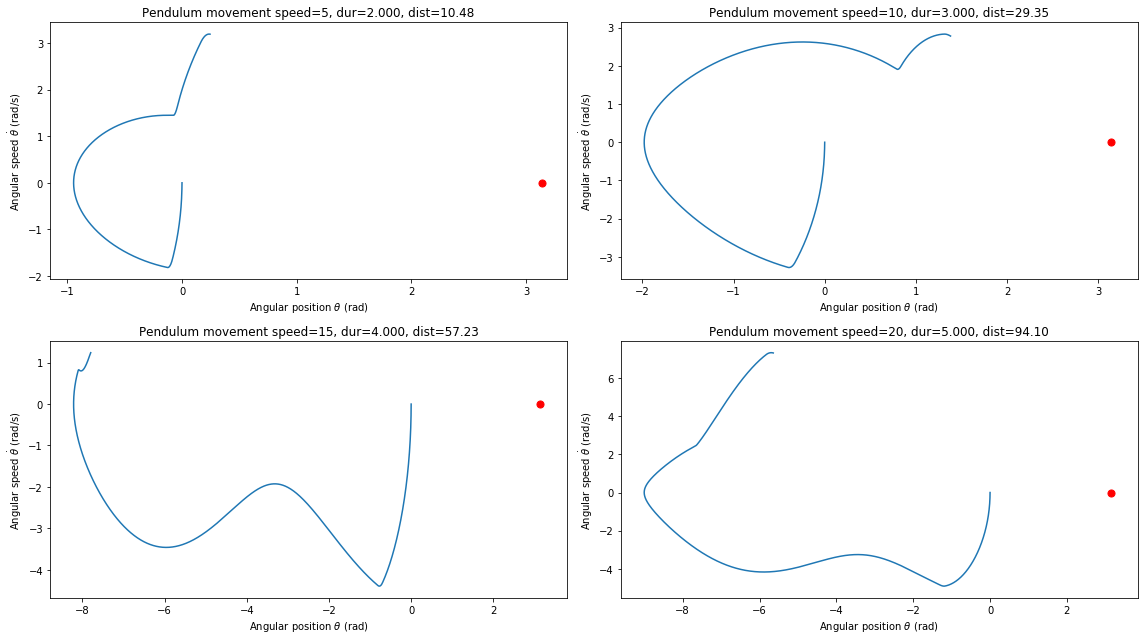

In [26]:
speeds = [5, 10, 15, 20]
durations = [2, 3, 4, 5]

# set the plot
fig, axs = plt.subplots(2, 2,figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot the 
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].scatter(np.pi, 0, marker='o', color='red', s=50) # target point
    ax[n].set_title('Pendulum movement speed={}, dur={:.3f}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

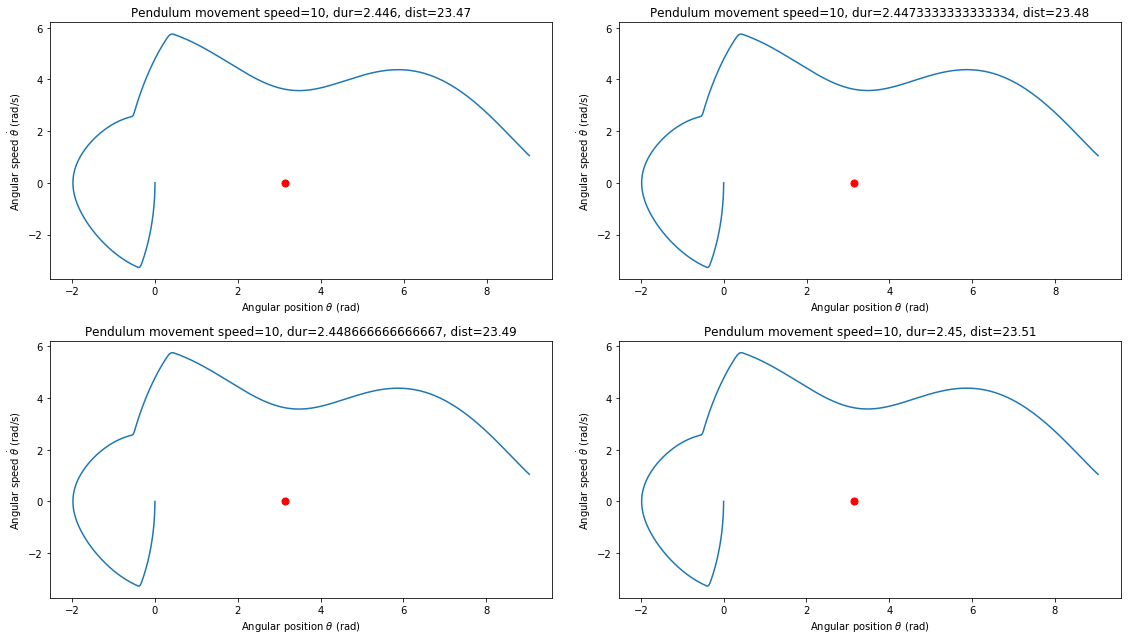

In [27]:
speeds = [10, 10, 10, 10]
durations = np.linspace(2.446, 2.45, 4) #[2, 3, 5, 10]
# set the plot
fig, axs = plt.subplots(2, 2, figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(2*durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].scatter(np.pi, 0, marker='o', color='red', s=50) # target point
    ax[n].set_title('Pendulum movement speed={}, dur={}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

With speed of 10 m/s and duration of 2.448 s we reach the equilibrium point theta = 3.14 rad but the travelled ditance is 23 m. The distances traveled by the pendulum are too big, we need shorter movements.

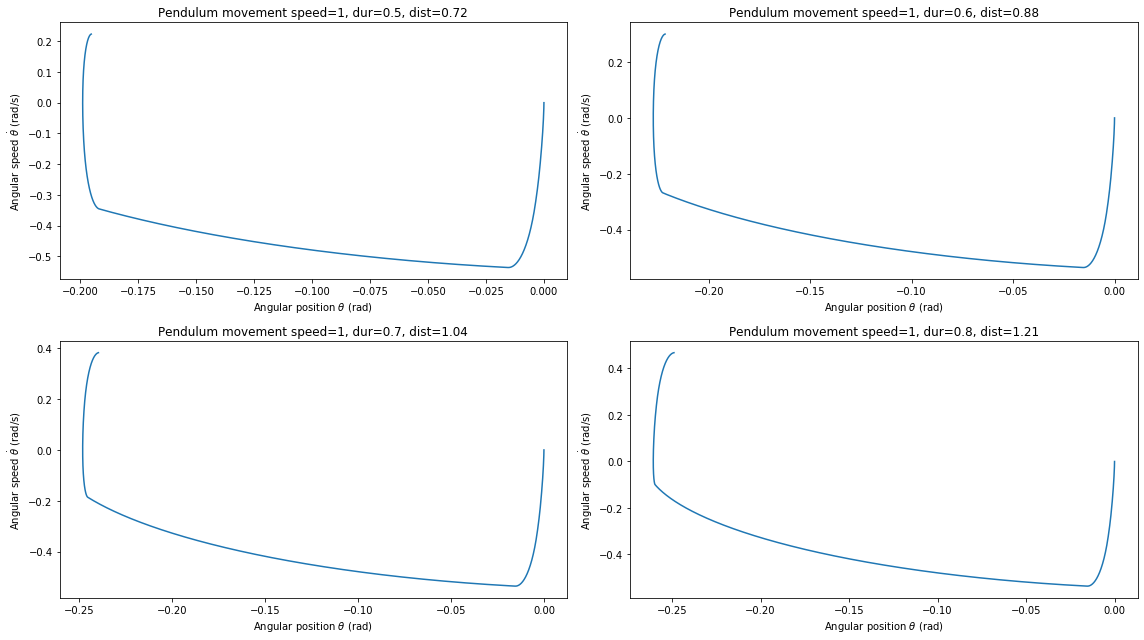

In [28]:

speeds = [1, 1, 1, 1]
durations = [0.5, 0.6, 0.7, 0.8]

# set the plot
fig, axs = plt.subplots(2, 2,figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot the 
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].set_title('Pendulum movement speed={}, dur={}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

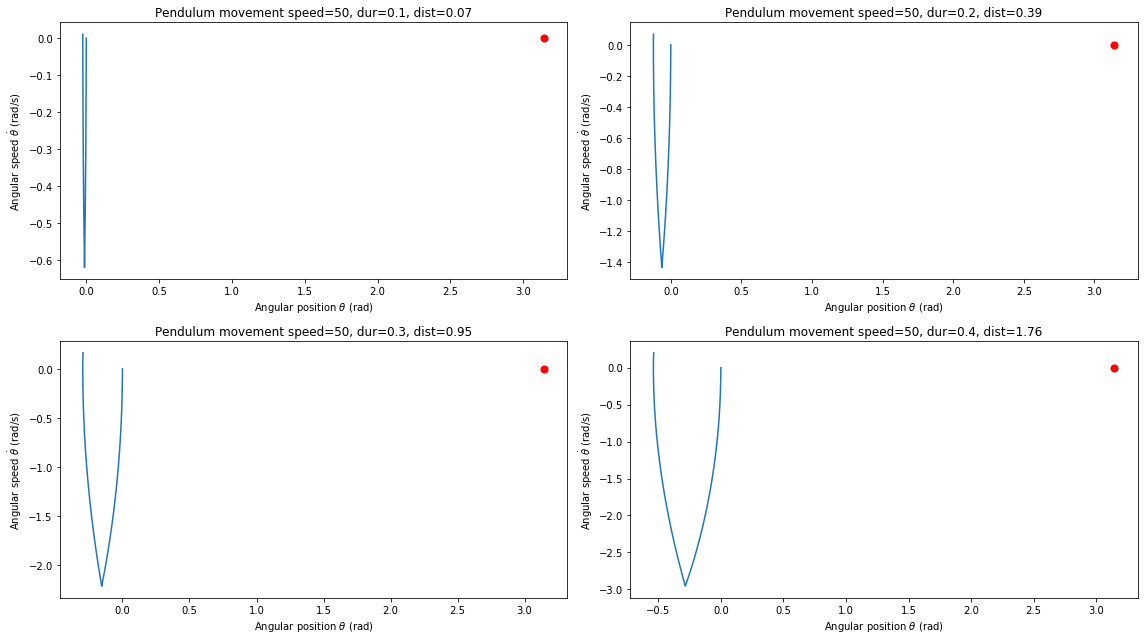

In [29]:
speeds = [50, 50, 50, 50]
durations = [0.1, 0.2, 0.3, 0.4]

# set the plot
fig, axs = plt.subplots(2, 2,figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].scatter(np.pi, 0, marker='o', color='red', s=50) # target point
    ax[n].set_title('Pendulum movement speed={}, dur={}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

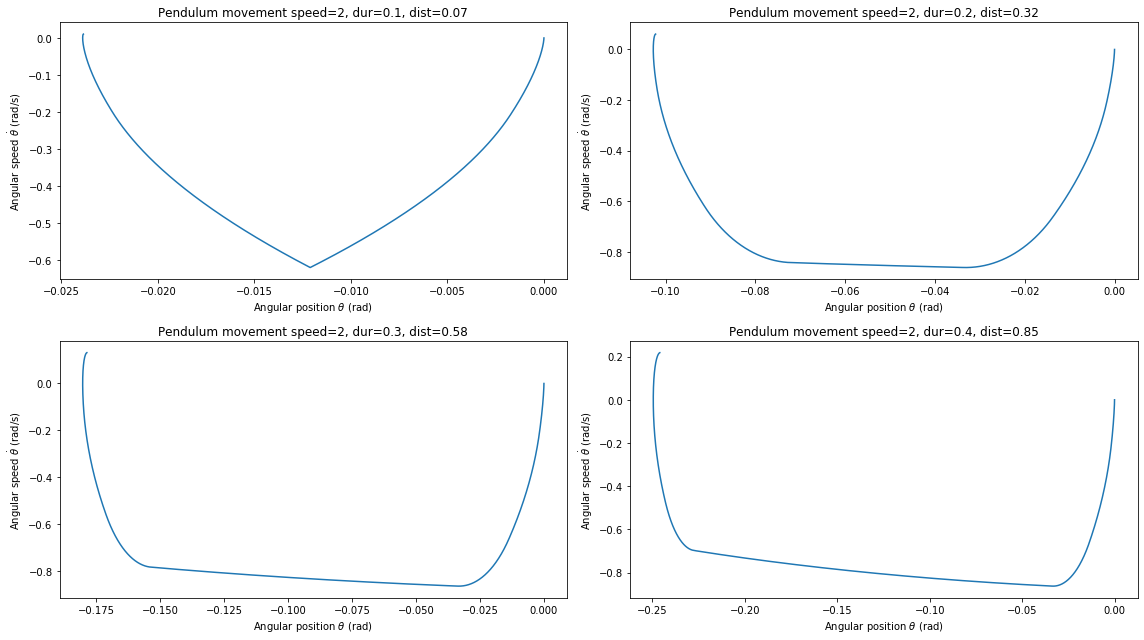

In [30]:

speeds = [2, 2, 2, 2]
durations = [0.1, 0.2, 0.3, 0.4]

# set the plot
fig, axs = plt.subplots(2, 2,figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot the 
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].set_title('Pendulum movement speed={}, dur={}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

The best movement we have so far is speed = 2 duration = 0.2 with a distance of 0.32.

**Question [5 points]:** Evaluate what the new location of the pivot point will be.   
You can calculate with the use of the acceleration profile of the motor control.    
Is this acceptable? If not find and acceptable move.

This distance of 0.32 is acceptable for a pendulum, maybe not for the pendulum we would use in the lab. So let's create a movement wich can be reproduced on the pendulum of the lab. We are focusing in moviments smaller than 30 cm.

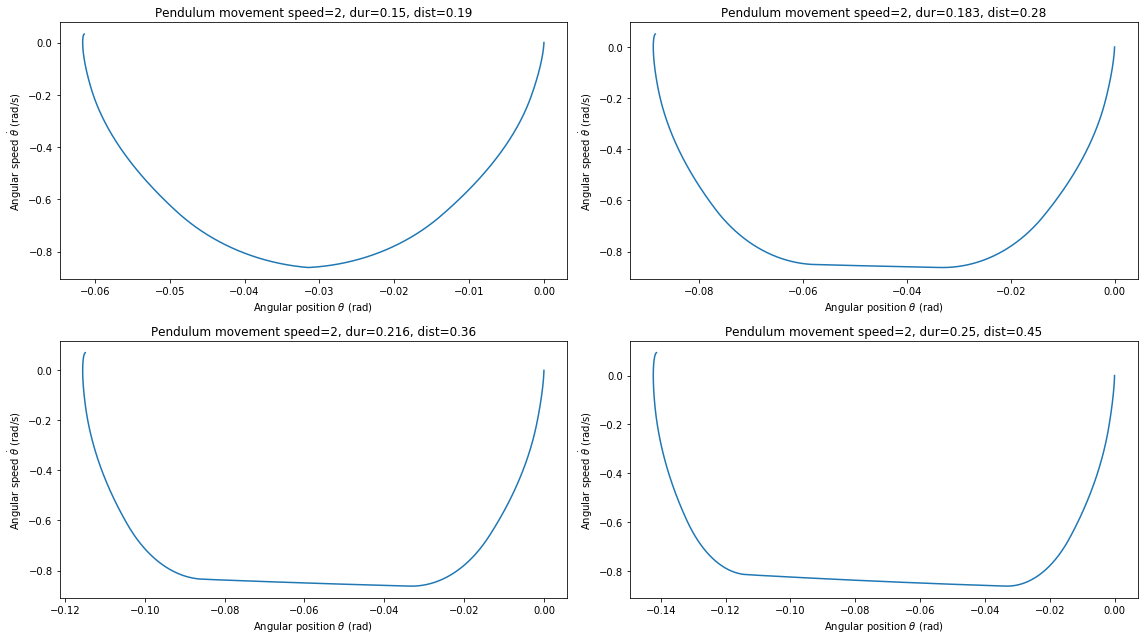

In [31]:
speeds = [2, 2, 2, 2]
durations = [0.15,0.183,0.216,0.25]

# set the plot
fig, axs = plt.subplots(2, 2,figsize=(16,9))
ax = axs.reshape(-1)
# calculate and plot the 
for n in range(4):
    
    # trace the movement
    motor = Motor_Acc(direction, speeds[n], durations[n],dt)
    theta_sum, theta_dot_sum = state_with_motor(durations[n])
    
    # plot it
    ax[n].plot(theta_sum, theta_dot_sum)
    ax[n].set_title('Pendulum movement speed={}, dur={}, dist={:.2f}'.format(speeds[n], durations[n], motor.dist))
    ax[n].set_xlabel(r'Angular position $\theta$ (rad)')
    ax[n].set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

Now with duration of 0.183 we have a movement possible to be done in the pendulum of the lab.

**Question [5 points]:** Now save the new theta and theta_dot that are the best motor action and start the same process again.  
repeat until the theta is close to pi (+-3).

With a single movement is impossible to swing up the pendulum. We need to set up an enviroment where we can use multiples movements to swing up. One way of doing is is saving the last position of the simulation and seting up a new motor command from the end of the previous simulation.

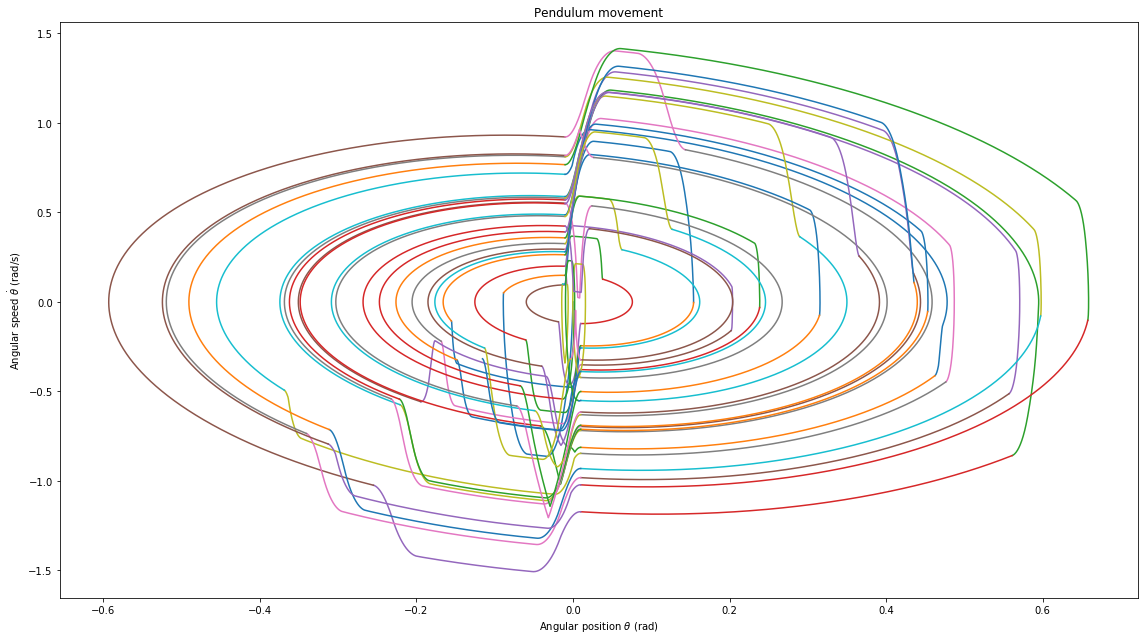

In [32]:
# initial condition: inertia
THETA_0 = 0
THETA_DOT_0 = 0

#the best movement we have
speed = 2
duration = 0.183
direction = 1

speeds = []
durations = []
speeds.append(speed)
durations.append(duration)
# trace the movement
motor = Motor_Acc(direction, speed, duration,dt)
theta_sum_previous, theta_dot_sum_previous = state_with_motor(duration)

# set the plot
fig, ax = plt.subplots(1, 1,figsize=(16,9))
ax.plot(theta_sum_previous, theta_dot_sum_previous)

for i in range(50): # up to 30 attempts
    if direction == 1:
        direction = 0
    else:
        direction = 1
    
    ###### Free movement until the pendulum is in the best position to gain energy #####
    # the initial condition is the last position
    theta = theta_sum_previous[-1]
    theta_dot = theta_dot_sum_previous[-1]
    if theta >= 3:
        break
    theta_sum = []
    theta_dot_sum = []
    for time in np.arange(0,2,dt):
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, 0)
        theta_dot += theta_double_dot * dt
        theta += theta_dot * dt
        # append theta and theta_dot to lists
        theta_sum.append(theta)
        theta_dot_sum.append(theta_dot)
        if abs(theta) < 0.01: #and direction == 1:
            break
    theta_sum_previous = theta_sum_previous + theta_sum
    theta_dot_sum_previous = theta_dot_sum_previous + theta_dot_sum
    ax.plot(theta_sum, theta_dot_sum)
    
    ###### Motor movement #######
    THETA_0 = theta_sum_previous[-1]
    THETA_DOT_0 = theta_dot_sum_previous[-1]
    if THETA_0 >= 3:
        break
    # trace the movement
    # random motor movement
    speed = 2 * np.random.random(1)
    duration = np.random.random(1)
    motor = Motor_Acc(direction, speed, duration,dt)
    while motor.dist > 0.3:
        speed = 2 * np.random.random(1)
        duration = np.random.random(1)
        motor = Motor_Acc(direction, speed, duration,dt)
    speeds.append(speed)
    durations.append(duration)
    
    # simulate the movement
    theta_sum, theta_dot_sum = state_with_motor(duration)
    theta_sum_previous = theta_sum_previous + theta_sum
    theta_dot_sum_previous = theta_dot_sum_previous + theta_dot_sum
    ax.plot(theta_sum, theta_dot_sum)
ax.set_title('Pendulum movement')
ax.set_xlabel(r'Angular position $\theta$ (rad)')
ax.set_ylabel(r'Angular speed $\dot{\theta}$ (rad/s)')

plt.tight_layout()
plt.show()

It was not possible to swing up the pendulum with the strategy used. A research was done and a promissing technique has been used in [1] and [2]. The proposed technique controls the energy of the pendulum to increase the total energy, kinect and potential, until the pendulum has enough energy to stop in the reach the top position in a controled way.

Now for the upward balance we will do with PID control.  
This video might help you to understand PID: https://www.youtube.com/watch?v=UR0hOmjaHp0  
Now the problem of control is a continues one so we can ignore using the motor class for now.

In [124]:
def pid_control(t, THETA_0, THETA_DOT_0, a, goal):
    # initial condition
    theta = THETA_0
    theta_dot = THETA_DOT_0
    
    # lists for later analysis
    list_t = []
    list_e = []
    acc = []
    
    # initialize the integrative error
    error_sum = 0.0
    
    # initialize the derivative error
    error = goal - theta
    previous_error = error
    
    # perform the simulation
    for time in np.arange(0,t,dt):
        # get the theta double dot and integrate
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a)
        theta += theta_dot * dt
        theta_dot += theta_double_dot * dt
        
        # calculate errors
        previous_error = error # derivative
        error_sum += error # integrative
        error = goal - theta # proportional
        
#         print(d * error - previous_error, p * error)
        
        if len(list_t)>0:
            # We need at least one step in simulation to be able to make use of an Integral or derivative component.
            a = p * error + i * (error_sum) + d * (error - previous_error)
        else:
            # the first step can only be a Proportional change
            a = p * error
        list_t.append(theta)
        list_e.append(error)
        acc.append(a)
    return list_t, list_e, acc

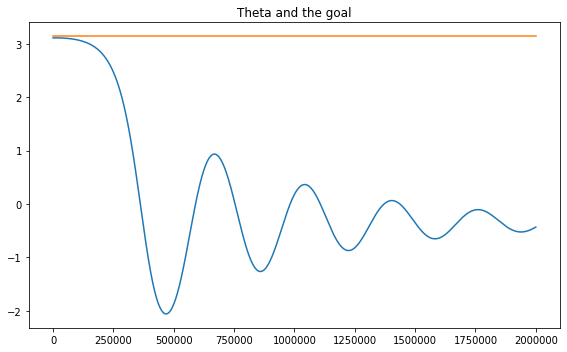

In [151]:
#lest say we start with an acceleration of 0
# for now we manipulate a directly to get an idea of how we should control things.
a = 0
simulation_time = 20
# define the PID constants
p = 1
i = 0
d = 1
# we now simulate what happens over time with theta and the error. 
# The error is the difference between the goal of pi radius and the actual theta. 
theta_list,error_list,acc = pid_control(simulation_time, np.pi-0.03, 0.01, a, np.pi)

fig, ax = plt.subplots(1, 1,figsize=(8,5))
ax.plot(range(len(theta_list)), theta_list)
ax.set_title('Theta and the goal')
ax.plot([0,len(theta_list)],[np.pi, np.pi])
plt.tight_layout()
plt.show()

**Question [5 points]:** What type of controller do we need P? PD? PI? or PID? explain why.

The P control is the basic control and is needed to guide the control in direction of the target value, in this case pi. The I control is used to remove offset error from the control, in our case the offset error is not going to happen, since a small change on the equilibrium is taking the pendulum away from pi. And the D control is used to avoid overshot and reduce the bouncing around the target value, because it compensates the rate of change of the error. For the pendulum the best control is the PD control.

Now the goal of a PID is to stabilize a system, hopefully as quick as possible.  
**Question [5 points]:** Implement the controller, explore different settings.  
Find the settings so that the model can be controlled in the range of pi-0.1 until pi+0.1

We are using the Ziegler–Nichols method to tune the PID, first set the Proportional constant until the system stabilise aroud the goal then set the Derivative constant to reduce the bouncing. We are not using the Integrative constant.

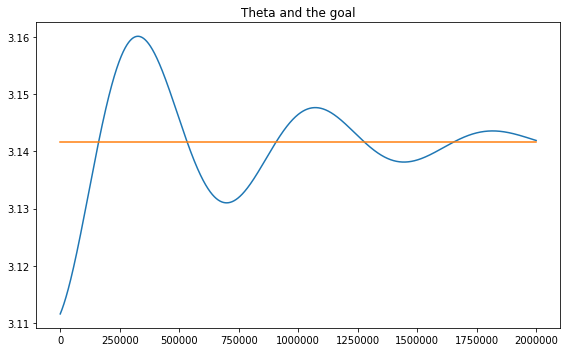

In [152]:
# define the PID constants
p = 12.0
i = 0.0
d = 0.0
# Simulate
theta_list,error_list,acc = pid_control(t = 20, THETA_0=np.pi-0.03, THETA_DOT_0=0.01, a = 0, goal=np.pi)

fig, ax = plt.subplots(1, 1,figsize=(8,5))
ax.plot(range(len(theta_list)), theta_list)
ax.set_title('Theta and the goal')
ax.plot([0,len(theta_list)],[np.pi, np.pi])
plt.tight_layout()
plt.show()

With P=12 we have the system floating around the goal. Now we set the Derivative constant.

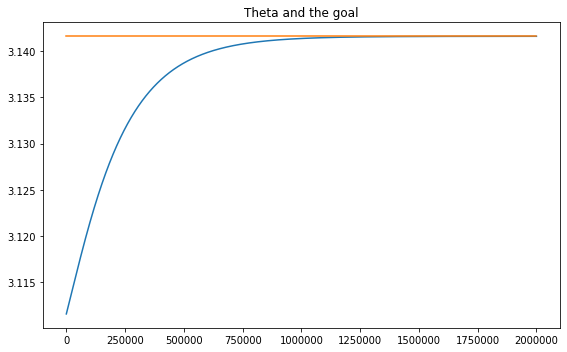

In [153]:
# define the PID constants
p = 12.0
i = 0.00
d = 500000
# Simulate
theta_list,error_list,acc = pid_control(t = 20, THETA_0=np.pi-0.03, THETA_DOT_0=0.01, a = 0, goal=np.pi)

fig, ax = plt.subplots(1, 1,figsize=(8,5))
ax.plot(range(len(theta_list)), theta_list)
ax.set_title('Theta and the goal')
ax.plot([0,len(theta_list)],[np.pi, np.pi])
plt.tight_layout()
plt.show()

**Question [5 points]:** Now also return the list of a values in the function pid_control and calculate and plot the pivot location over time. Is this acceptable or is it necessary to change the controls because the deflections are too large?

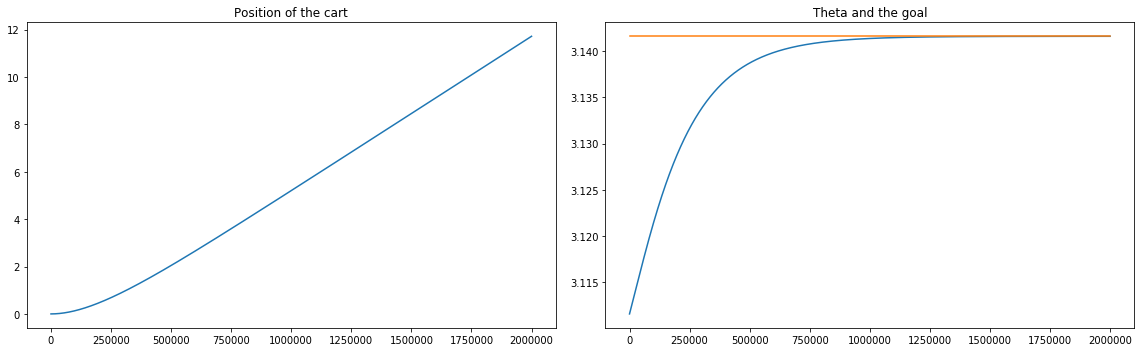

In [154]:
# define the PID constants
p = 12.0
i = 0.00
d = 500000
# Simulate
theta_list,error_list,acc = pid_control(t = 20, THETA_0=np.pi-0.03, THETA_DOT_0=0.01, a = 0, goal=np.pi)

# calculate the position
v = 0 # speed
p = 0 # position
pos = [p]
for time in range(int(20/dt)):
    v += acc[time] * dt
    p += v * dt
    pos.append(p)

# plot the result
fig, axs = plt.subplots(1, 2,figsize=(16,5))
axs[0].plot(range(len(pos)), pos)
axs[0].set_title('Position of the cart')
axs[1].plot(range(len(theta_list)), theta_list)
axs[1].set_title('Theta and the goal')
axs[1].plot([0,len(theta_list)],[np.pi, np.pi])
plt.tight_layout()
plt.show()

This configuration can control with extreme precision but it would require more than 10 m to maintain the equilibrium. Let's tune the PD control to reduce the displacement of the cart.

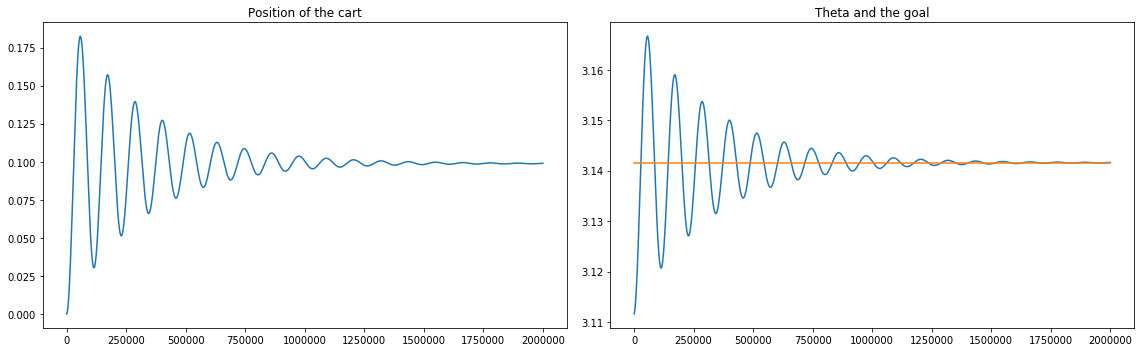

In [155]:
# define the PID constants
p = 100.0
i = 0.0
d = 100000.0
# Simulate
theta_list,error_list,acc = pid_control(t = 20, THETA_0=np.pi-0.03, THETA_DOT_0=0.01, a = 0, goal=np.pi)

# calculate the position
v = 0 # speed
p = 0 # position
pos = [p]
for time in range(int(20/dt)):
    v += acc[time] * dt
    p += v * dt
    pos.append(p)

# plot the result
fig, axs = plt.subplots(1, 2,figsize=(16,5))
axs[0].plot(range(len(pos)), pos)
axs[0].set_title('Position of the cart')
axs[1].plot(range(len(theta_list)), theta_list)
axs[1].set_title('Theta and the goal')
axs[1].plot([0,len(theta_list)],[np.pi, np.pi])
plt.tight_layout()
plt.show()

Increasing the Proportional constant and reducing the Derivative constant we can have a overshoot but the system still have a good dumping ratio to stabilize. And the distance necessary is close the 20 cm.

## References

[1] Bugeja, M. (2003). Non-linear swing-up and stabilizing control of an inverted pendulum system. IEEE Region 8 EUROCON 2003: Computer as a Tool - Proceedings, B(May), 437–441. https://doi.org/10.1109/EURCON.2003.1248235

[2] Yoshida, K. (1999). Swing-up control of an inverted pendulum by energy-based methods. Proceedings of the American Control Conference, 6(February 1999), 4045–4047. https://doi.org/10.1109/acc.1999.786297